# Project 2 - Ames Housing Data and Kaggle Challenge

In this project I was given the Ames Housin Dataset consisting of over 70 columns of different features relating to houses. My task was to create a regression model to be able to predict the price of the house at sale based on the characteristics of the house. This model will help real-estate agents, and others, to be able to more accurately price a new house going on the market. 

First and foremost I had to focus on exploring the data, identifying outliers and filling in missing values. After I made the data appropriate to fit in to a regression model I used the sklearn LinearRegression to model. I also fit a lasso and ridge models and elastic net.

The success of the models was measured by R^2 and RMSE. Submission on Kaggle, allowed to check the model on a new set of data.


# Modeling

### Content:
- [Data Import and First Glance](#Data-Import-and-First-Glance)
- [Model Prep. Train and Test Split](#Model-Prep.-Train-and-Test-Split)
- [Modeling](#Modeling)<br>
    -[Linear Regression](Linear-Regression)<br>
    -[Ridge](#Ridge-Regression)<br>
    -[Lasso](#Lasso-Regression)<br>
    -[Elastic Net](#Elastic-Net)<br>
- [Submissions](#Submissions)<br>
- [Conclusions](#Conclusions)<br>

## Data Import and First Glance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

In [2]:
train = pd.read_csv('datasets/train_cleaned.csv')
test = pd.read_csv('datasets/test_cleaned.csv')

print('The shape of the Train data is {}'.format(train.shape))
print('The shape of the Test data is {}'.format(test.shape))

The shape of the Train data is (1997, 98)
The shape of the Test data is (878, 97)


Previously, I cleaned and feature engineered the data. We originally started with 80 feature variables. After taking care of missing values, outliers, creating columns, and creating dummies, now we have 96 variables to feed in to the models we will run. 

In [3]:
train.head()

,Bedroom AbvGr,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,BsmtExposureEnc,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,...,PavedDriveEnc,SalePrice,SaleTypeEnc,TotRms AbvGrd,Total Bsmt SF,TotalBath,TotalPorch,TotalSF,Year Built,Year Remod/Add
0,3,0,0,0,0,1,1.0,0,1,0,...,1.0,11.779129,1.0,6,725.0,2.5,44,2204.0,1976,2005
1,4,0,1,0,0,0,1.0,0,1,0,...,1.0,12.301383,1.0,8,913.0,3.5,74,3035.0,1996,1997
2,3,0,0,0,0,1,1.0,0,1,0,...,1.0,11.599103,1.0,5,1057.0,2.0,52,2114.0,1953,2007
3,3,0,1,0,0,0,1.0,0,0,0,...,1.0,12.066811,1.0,7,384.0,2.5,100,1828.0,2006,2007
4,3,1,0,0,0,0,1.0,0,0,0,...,0.0,11.838626,1.0,6,676.0,2.0,59,2121.0,1900,1993


In [4]:
test.head()

,Bedroom AbvGr,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,BsmtExposureEnc,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,...,PID,PavedDriveEnc,SaleTypeEnc,TotRms AbvGrd,Total Bsmt SF,TotalBath,TotalPorch,TotalSF,Year Built,Year Remod/Add
0,4,1,0,0,0,0,1.0,0,0,0,...,902301120,1.0,1.0,9,1020,2.0,172,2948,1910,1950
1,6,0,1,0,0,0,1.0,0,0,0,...,905108090,1.0,1.0,10,1967,2.0,170,3934,1977,1977
2,3,0,1,0,0,0,0.0,0,1,0,...,528218130,1.0,0.0,7,654,3.5,124,2150,2006,2006
3,2,0,0,0,0,1,1.0,0,0,0,...,902207150,0.0,1.0,5,968,1.0,184,1936,1923,2006
4,3,0,1,0,0,0,1.0,1,0,0,...,535105100,1.0,1.0,6,1394,2.5,261,2788,1963,1963


In [5]:
train.columns

Index(['Bedroom AbvGr', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_None',
       'Bsmt Qual_Po', 'Bsmt Qual_TA', 'BsmtExposureEnc', 'BsmtFin Type 1_BLQ',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_None',
       'BsmtFin Type 1_Rec', 'BsmtFin Type 1_Unf', 'Central Air_Y',
       'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Exterior1stEnc',
       'Exterior2Enc', 'Fireplace Qu_Fa', 'Fireplace Qu_Gd',
       'Fireplace Qu_None', 'Fireplace Qu_Po', 'Fireplace Qu_TA', 'Fireplaces',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Garage Area',
       'Garage Finish_None', 'Garage Finish_RFn', 'Garage Finish_Unf',
       'Garage Yr Blt', 'GarageQualEnc', 'GarageTypeEnc', 'Gr Liv Area',
       'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_Po', 'Heating QC_TA',
       'Id', 'Kitchen AbvGr', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd',
       'Kitchen Qual_Po', 'Kitchen Qual_TA', 'Lot Area', 'Lot Frontage',

## Model Prep. Train and Test Split

In [6]:
y = train.SalePrice
X = train.drop(['Id', 'SalePrice'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,  test_size=.33)


## Modeling

### Linear Regression

Here I went ahead and fit a Linear Regression model. My RMSE for the test split came out to be 0.12. RMSE measures how much error the model makes. So we wanted it to be as close to 0 as possible. My model score differed slightly from my prediction score. This might suggested slight overfitting. By cross validation score for the most part lines up with my train score, which tells me that there is probably no high variance. Looking at the coefficients of the model, it seemed that the most negative correlation came from a house not having a Garage and being in a MeadowV neighborhood. Having a negative correlation with not having a garage made sense. People do usually value having one. The significance that this model placed on masonry veneer type, made me cautious to accept this model as the best though. This seemed fishy. 

In [7]:
lr = linear_model.LinearRegression()
model_lr= lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

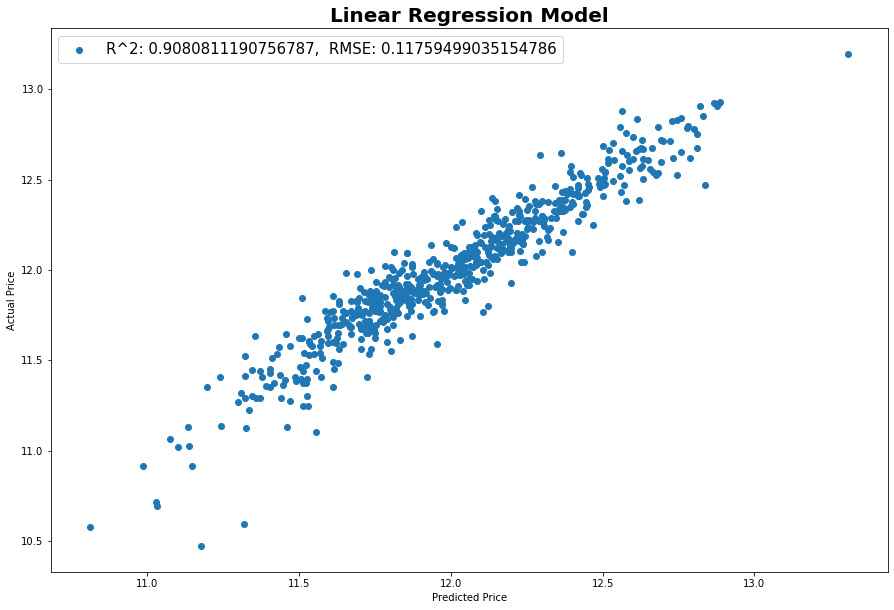

In [8]:
r_squared = model_lr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

plt.figure(figsize = (15,10))
plt.scatter(y_pred_lr, y_test)

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model', weight='bold', fontsize=20);
plt.legend(['R^2: {},  RMSE: {}'.format(r_squared, rmse)], loc = 'upper left', fontsize = 15);

In [9]:
model_lr.score(X_train, y_train)

0.9163738696316517

In [10]:
cross_val_score(model_lr, X_train, y_train, cv=5).mean()

0.8952665561543445

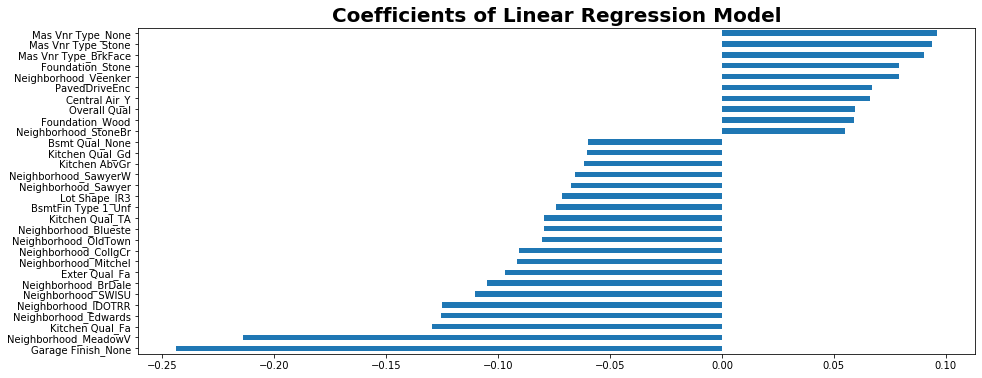

In [11]:
coef = pd.Series(model_lr.coef_, index = X.columns)
coeficients = pd.concat([coef.sort_values().head(20), coef.sort_values().tail(10)])

plt.figure(figsize = (15,6))
coeficients.plot(kind = 'barh')
plt.title('Coefficients of Linear Regression Model', weight = 'bold', fontsize = 20);


### Ridge Regression

I went with alpha = 75 mainly because this is the alpha that produced the most similar R^2 scores for train and test. Even though there were lower alphas that were giving me a slightly lower RMSE, I was worried about overfitting. It also gave the most different distribution of coeficients from other models. 

In [12]:
ridge = linear_model.Ridge(alpha = 75, max_iter = 500000)
model_ridge = ridge.fit(X_train, y_train)

predictions_ridge = model_ridge.predict(X_test)

r_squared_ridge = model_ridge.score(X_test, y_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, predictions_ridge))

/Users/yelenanevel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08477e-18): result may not be accurate.
  overwrite_a=True).T


In [13]:
r_squared_ridge

0.9008473626083638

In [14]:
rmse_ridge

0.12213456556487744

In [15]:
model_ridge.score(X_train, y_train)

0.906558674290888

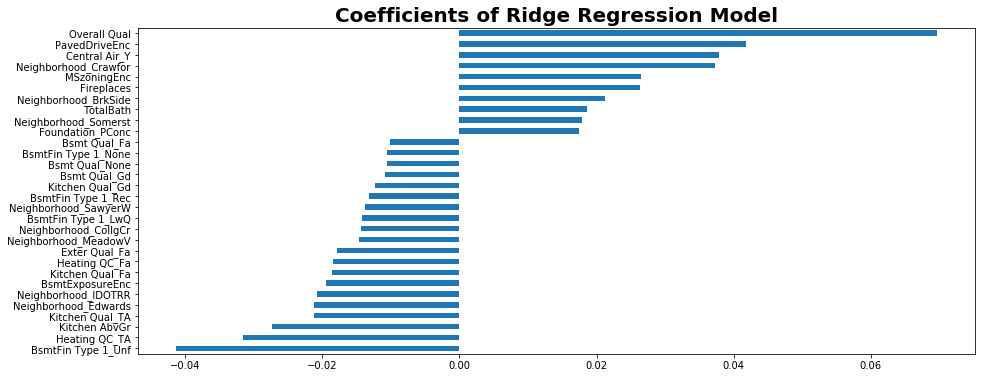

In [16]:
coef_ridge = pd.Series(model_ridge.coef_, index = X.columns)
coeficients_ridge = pd.concat([coef_ridge.sort_values().head(20), coef_ridge.sort_values().tail(10)])

plt.figure(figsize = (15,6))
coeficients_ridge.plot(kind = 'barh')
plt.title('Coefficients of Ridge Regression Model', weight = 'bold', fontsize = 20);


### Lasso Regression

When I was trying to pick the best alpha for the jobs, I was trying to decide between two alphas: 0.0001 and 0.001. These two gave the best results. With alpha = 0.0001, I got an R^2_test = 0.9084, R^2_train = 0.91578, and RMSE = 0.1174. The R^2 scores differed a bit which to be signaled maybe some overfitting. With alpha = 0.001 it was , R^2_test = 0.9033, R^2_train = 0.9073 and RMSE = 0.1206. Even though the RMSE was worse, when looking at top coefficients they intuitively made more sense. The top two were Crawford neighborhood and Overall Quality. For the other model the coeficients strongly leaned on Neighborhoods. At the end I just passed both of them into Kaggle public scoring and alpha = 0.0001 won by over 200 points. Out of the Linear Regression, Lasso and Ridge when submitted to Kaggle public scores, Ridge did the worse.

In [17]:
lasso = linear_model.Lasso(alpha = 0.0001, max_iter = 500000)

model_lasso = lasso.fit(X_train, y_train)

predictions_lasso = model_lasso.predict(X_test)

r_squared_lasso = model_lasso.score(X_test, y_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, predictions_lasso))



In [18]:
r_squared_lasso

0.9083917959847504

In [19]:
rmse_lasso

0.11739609231002232

In [20]:
model_lasso.score(X_train, y_train)

0.9157936395666283

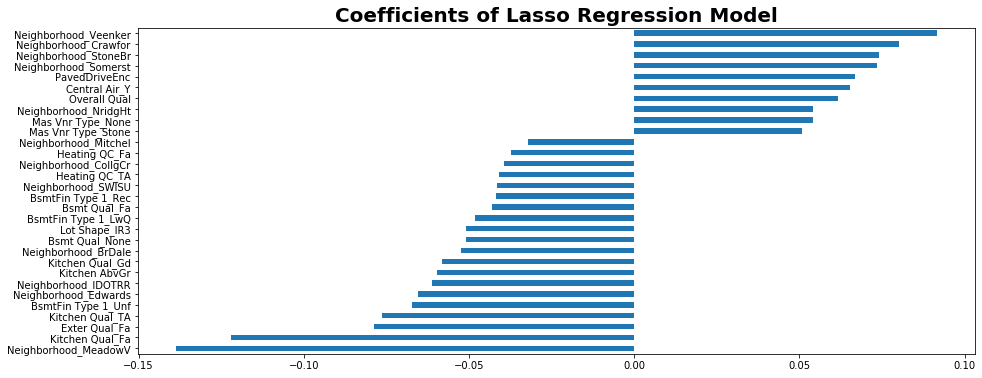

In [21]:
coef_lasso = pd.Series(model_lasso.coef_, index = X.columns)
coeficients_lasso = pd.concat([coef_lasso.sort_values().head(20), coef_lasso.sort_values().tail(10)])

plt.figure(figsize = (15,6))
coeficients_lasso.plot(kind = 'barh')
plt.title('Coefficients of Lasso Regression Model', weight = 'bold', fontsize = 20);


### Elastic Net

By running cross validation on the Elastic Net model I found that the optimal alpha is 0.001 and optimal l1_ration is 0.1. This seemed to have performed the best. The difference is RMSE between Linear Regression and Elastic Net is small but it is there. Also, the coeficient distribution greatly differ from what we saw in Linear Regression. Elastic Net along lasso tend to favour neighborhoods the most. When submitted to Kaggle public board, it was right behind the Linear Regression model, which did surprise me considering it had the second lowest RMSE. The Kaggle public score for Elastic Net was lower than for Lasso.

In [22]:
elnet = linear_model.ElasticNet(alpha = 0.001, l1_ratio=0.1, max_iter = 500000)

model_elnet = elnet.fit(X_train, y_train)

predictions_elnet = model_elnet.predict(X_test)

r_squared_elnet = model_elnet.score(X_test, y_test)

rmse_elnet = np.sqrt(mean_squared_error(y_test, predictions_elnet))

In [23]:
r_squared_elnet

0.9083861865605928

In [24]:
rmse_elnet

0.11739968649900777

In [25]:
model_elnet.score(X_train, y_train)

0.9154619772855702

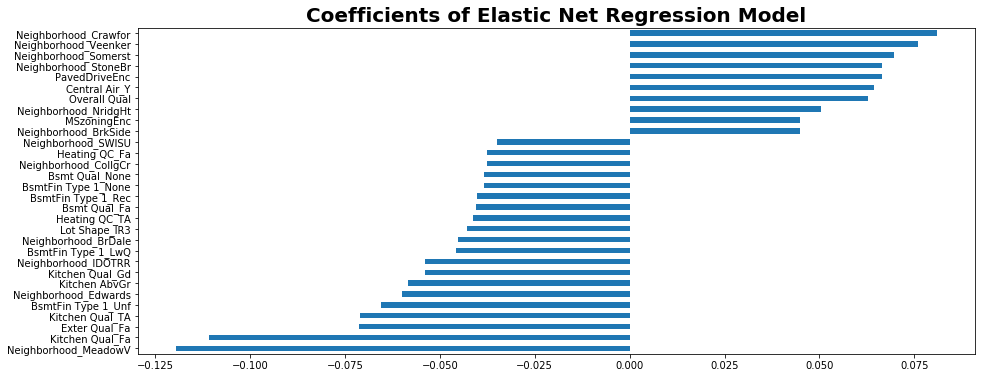

In [26]:
coef_elnet = pd.Series(model_elnet.coef_, index = X.columns)
coeficients_elnet = pd.concat([coef_elnet.sort_values().head(20), coef_elnet.sort_values().tail(10)])

plt.figure(figsize = (15,6))
coeficients_elnet.plot(kind = 'barh')
plt.title('Coefficients of Elastic Net Regression Model', weight = 'bold', fontsize = 20);

## Submissions

In [27]:
#Linear Regression model Kaggle submissions
prediction_df = test.drop('Id', axis = 1)

test_predictions = model_lr.predict(prediction_df)

final_predictions = np.exp(test_predictions) 

output_lr = pd.DataFrame()

output_lr['Id'] = test['Id']

output_lr['SalePrice'] = final_predictions

output_lr.to_csv('datasets/output/output_lr.csv', index = False)


In [28]:
#Ridge

test_predictions_ridge = model_ridge.predict(prediction_df)

final_predictions_ridge = np.exp(test_predictions_ridge) 

output_ridge = pd.DataFrame()

output_ridge['Id'] = test['Id']

output_ridge['SalePrice'] = final_predictions_ridge

output_ridge.to_csv('datasets/output/output_ridge.csv', index = False)

In [29]:
#Lasso

#Linear Regression model Kaggle submissions
#prediction_df = test.drop('Id', axis = 1)

test_predictions_lasso = model_lasso.predict(prediction_df)

final_predictions_lasso = np.exp(test_predictions_lasso) 

output_lasso = pd.DataFrame()

output_lasso['Id'] = test['Id']

output_lasso['SalePrice'] = final_predictions_lasso

output_lasso.to_csv('datasets/output/output_lasso_0001.csv', index = False)

In [30]:
#Elastic Net

test_predictions_elnet = model_elnet.predict(prediction_df)

final_predictions_elnet = np.exp(test_predictions_elnet) 

output_elnet = pd.DataFrame()

output_elnet['Id'] = test['Id']

output_elnet['SalePrice'] = final_predictions_elnet

output_elnet.to_csv('datasets/output/output_elnet.csv', index = False)

## Conclusions

|Method|R^2_train|R^2_test|RMSE|Top Coef|Bottom Coef
|---|---|---|---|---|---|
|**Linear Regression**|0.9064|0.9081|0.1176|Mas Vnr Type_None, Mas Vnr Type_Stone, Mas Vnr Type_BrkFase| Garage Finish_None, Neighborhood MeadowV, Kitchen Qual_Fa|
|**Ridge**|0.9066|0.9008|0.1221|Overall Qual, PavedDriveEnc, Central Air_Y| BsmtFin Type1_unf, Heating QC_TA, Kitchen Abv Gr|
|**Lasso**|0.9158|0.9084|0.1174|Neighborhood Veenker, Neighborhood Crawford, Neighborhood StoneBr|Neighborhood Meadow V, Kitchen Qual_Fa, External Qual_Fa|
|**Elastic Net**|0.9084|0.9084|0.1174(a little higher than lasso|Neighborhood Veenker, Neighborhood Crawford, Neighborhood Smerst|Neighborhood Meadow V, Kitchen Qual_Fa, External Qual_Fa|

During the EDA process, it was suggested that the top correlated features with Sale Price are Overall Qual, Total SF, Gr Liv Area, Garage Area, Neighborhood, Bsmt Qual, Exter Qual and Kitchen Qual. When I ran the different models, intuitevely, going off of EDA, the models that should have performed the best were Ridge and Lasso. The Elastic Net was very close to Lasso. I say intuitevely because when looking at the coefficients, the ones for Ridge and Lasso were closer to the EDA suggestions. The Linear Regression did well when comparing R^2 for test and train and did well with RMSE. However when looking at the top coefficients they seemed misleading. My Lasso model had the smallest RMSE and was putting a lot of emphasis on Neighborhoods. The best way to tell which model is the best would be to take a completely unseen data set and run all 4 models on it. 

As a next step it would be interesting to see how the data performs on different, non-linear, models. Another step would be to try and encode the ordinal features to numerical and nominal to categorical. Unfortunately, when I tried to do this for this project it lowered my R^2 and raised my RMSE significantly enough to where I deserted the idea for now. 

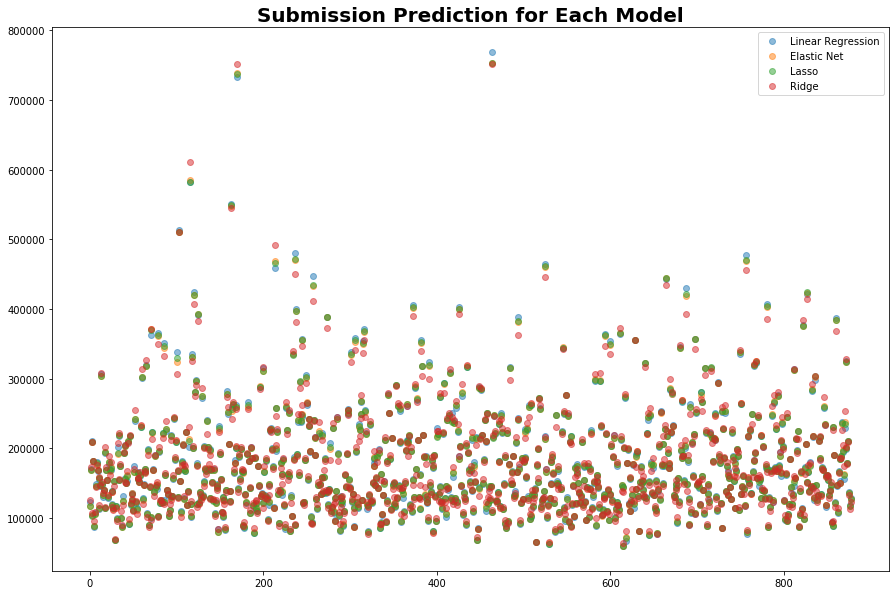

In [31]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(final_predictions,'o', alpha = 0.5)
ax.plot(final_predictions_elnet, 'o', alpha = 0.5)
ax.plot(final_predictions_lasso, 'o', alpha = 0.5)
ax.plot(final_predictions_ridge, 'o', alpha = 0.5)
ax.set_title('Submission Prediction for Each Model', weight = 'bold', fontsize = 20)
plt.legend(['Linear Regression', 'Elastic Net', 'Lasso', "Ridge"]);